# Global Power Plant Database Project

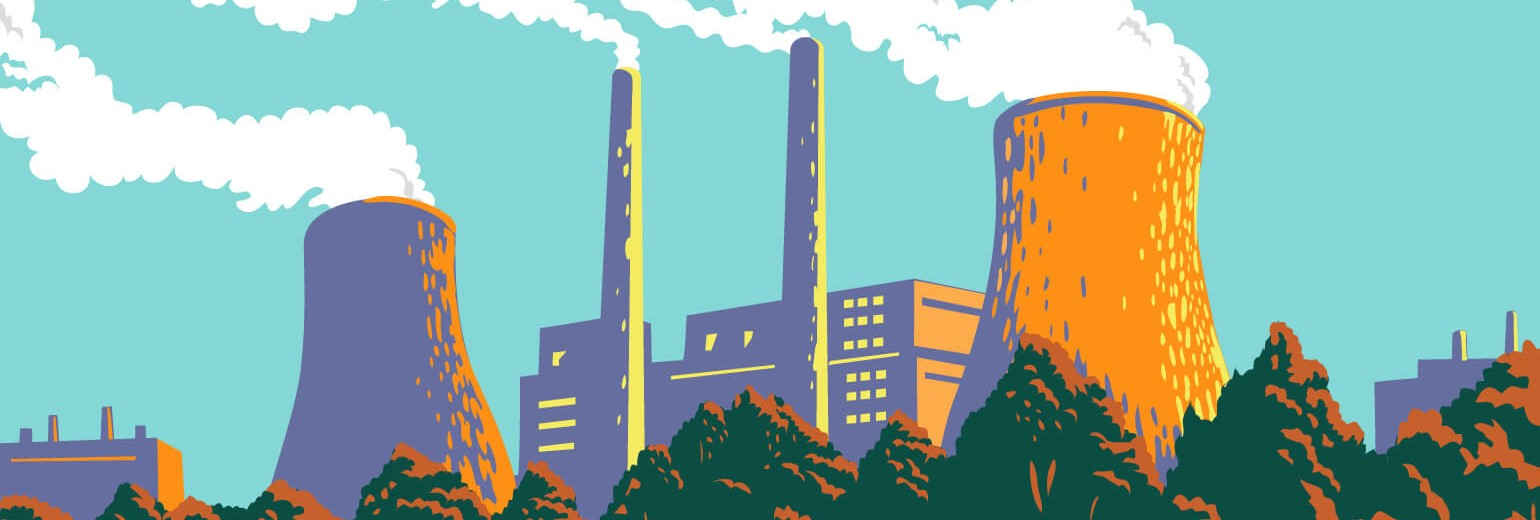

Dataset  

    This dataset contains information regarding power plants around the world.
    The Global Power Plant Database is a comprehensive, open source database which centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.
    Based on the relevant features, machine learning models can be built for prediction of 1) Primary Fuel (classification problem)and 2) capacity_mw (regression problem).

Input features

    country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
	`country_long` (text): longer form of the country designation
	`name` (text): name or title of the power plant, generally in Romanized form
	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	`primary_fuel` (text): energy source used in primary electricity generation or export
	`other_fuel1` (text): energy source used in electricity generation or export
	`other_fuel2` (text): energy source used in electricity generation or export
	`other_fuel3` (text): energy source used in electricity generation or export
	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
	`owner` (text): majority shareholder of the power plant, generally in Romanized form
	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
	`url` (text): web document corresponding to the `source` field
	`geolocation_source` (text): attribution for geolocation information
	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
	`year_of_capacity_data` (number): year the capacity information was reported
	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
	`generation_data_source` (text): attribution for the reported generation information
	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Output label  

    `primary_fuel` (text): energy source used in primary electricity generation or export
    
    `capacity_mw` (number): electrical generating capacity in megawatts

Aim:

    Develop a machine learning model for the prediction of 1) Primary Fuel (classification problem) and 2) capacity_mw (regression problem).

In [63]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import re
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [64]:
# load data

aus=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
aus.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# load data

ind=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
ind.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [66]:
# load data

usa=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")
usa.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data pre-processing & EDA

In [67]:
# combine all 3 datasets

pp_df=pd.concat([aus,ind,usa],axis=0)
pp_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# create a copy of original dataset for cleaning and analysis

pp_df1=pp_df.copy()

In [69]:
pp_df1.shape

(13298, 27)

In [70]:
# check for duplicates

duplicates=pp_df1.duplicated()

print('No. of duplicates in the dataset: ', pp_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', pp_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [71]:
pp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [72]:
# check for nulls

pp_df1.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

Observation:

    There are high number of nulls in the dataset
    There are 13298 records in the dataset with 27 columns  
    The columns have these datatypes: float64(13), object(14)

In [73]:
# drop nulls if the column has more than 70% null values

print('Size of dataset before dropping columns: ',pp_df1.shape)
threshold=0.7*len(pp_df1)
pp_df1=pp_df1.dropna(thresh=threshold,axis=1)
print('Size of dataset after dropping columns: ',pp_df1.shape)

Size of dataset before dropping columns:  (13298, 27)
Size of dataset after dropping columns:  (13298, 17)


Observation:

    10 columns had more than 70% null values and those were dropped from the dataset

In [74]:
pp_df1.isnull().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
commissioning_year        2644
owner                      593
source                       0
url                          0
geolocation_source          23
year_of_capacity_data      438
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source    2463
dtype: int64

In [75]:
pp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13292 non-null  float64
 5   latitude                13220 non-null  float64
 6   longitude               13220 non-null  float64
 7   primary_fuel            11294 non-null  object 
 8   commissioning_year      10654 non-null  float64
 9   owner                   12705 non-null  object 
 10  source                  13298 non-null  object 
 11  url                     13298 non-null  object 
 12  geolocation_source      13275 non-null  object 
 13  year_of_capacity_data   12860 non-null  float64
 14  generation_gwh_2018     9858 non-null   flo

Observation:

    generation_gwh_2019 has object datatype, so lets check if it contains any non-numeric values with the help of regex


In [77]:
# fill nulls in generation_gwh_2019 column

pp_df1['generation_gwh_2019'].fillna(0.0,inplace=True)
pp_df1['generation_gwh_2019'].replace('nan',0.0, inplace=True)

pp_df1['generation_gwh_2019'].isnull().sum()

0

In [80]:
# find any object data in generation_gwh_2019 using regex

pp_df1['generation_gwh_2019']=pp_df1['generation_gwh_2019'].astype(str)
for i in pp_df1['generation_gwh_2019']:

    if re.findall(r'[a-zA-z]+', i):
      print('The object data in the generation_gwh_2019 column is', i)
      display(pp_df1[pp_df1['generation_gwh_2019']==i])

The object data in the generation_gwh_2019 column is Central Electricity Authority


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,generation_data_source
302,IND,India,Jeloo Wind Farm,WRI1026099,29.6,26.5255,72.7629,Wind,2004.0,Energy Infratech Private Limited,CDM,https://cdm.unfccc.int/Projects/DB/BVQI1312546...,WRI,NaN,NaN,Central Electricity Authority,NaN


In [81]:
# drop the record with the object data in above column

pp_df1=pp_df1[pp_df1['generation_gwh_2019']!='Central Electricity Authority']


In [82]:
# set the datatype of generation_gwh_2019 as float

pp_df1['generation_gwh_2019']=pp_df1['generation_gwh_2019'].astype(float)

In [83]:
# fill nulls in all columns

pp_df1['capacity_mw'].fillna(pp_df1['capacity_mw'].mean(),inplace=True)
pp_df1['latitude'].fillna(pp_df1['latitude'].mode()[0],inplace=True)
pp_df1['longitude'].fillna(pp_df1['longitude'].mode()[0],inplace=True)
pp_df1['primary_fuel'].fillna('Unknown',inplace=True)
pp_df1['commissioning_year'].fillna(0.0,inplace=True)
pp_df1['owner'].fillna('Unknown',inplace=True)
pp_df1['geolocation_source'].fillna(pp_df1['geolocation_source'].mode()[0],inplace=True)
pp_df1['year_of_capacity_data'].fillna(0.0,inplace=True)
pp_df1['generation_gwh_2018'].fillna(0.0,inplace=True)
pp_df1['generation_data_source'].fillna('Unknown',inplace=True)

In [85]:
# confirm if all nulls have been handled

pp_df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [86]:
pp_df1.shape

(13297, 17)

Observation:

    All the nulls have been handled
    Dataset after handling nulls contain 13298 rows and 17 columns

In [89]:
pp_df1.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019
count,13297.000000,13297.000000,13297.000000,13297.000000,13297.000000,13297.000000,13297.000000
mean,117.745348,35.079564,-73.819468,1600.861696,1952.646462,380.826333,310.242432
std,347.102913,15.402868,62.673910,797.852526,359.964924,1705.493595,1463.462479
min,0.000000,-42.888300,-171.712400,0.000000,0.000000,-982.622000,-780.339000
25%,1.500000,33.914400,-104.583400,1954.000000,2019.000000,0.000000,0.000000
50%,5.500000,38.468100,-87.107700,2000.275862,2019.000000,3.799000,3.945000
75%,53.000000,42.166100,-75.535800,2014.000000,2019.000000,56.530000,46.124000
max,6809.000000,425.246100,153.434100,2020.000000,2019.000000,35136.000000,31920.368000


In [90]:
# check number of unique values in each column

unique=pp_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
country,3
country_long,3
name,13265
gppd_idnr,13297
capacity_mw,2305
latitude,12384
longitude,12732
primary_fuel,15
commissioning_year,1937
owner,5878


In [91]:
# take the count of each unique value in each column

for i in pp_df1.columns:
    print(pp_df1.value_counts(pp_df1[i]),'\n')

country
USA    11879
IND      906
AUS      512
Name: count, dtype: int64 

country_long
United States of America    11879
India                         906
Australia                     512
Name: count, dtype: int64 

name
Richland                   3
Adams Solar                2
Quincy Solar               2
Wilson Solar               2
Drop 5                     2
                          ..
Geraldton                  1
Geranium Solar  LLC        1
Gerdau                     1
German Creek               1
iEnergy Theni Wind Farm    1
Name: count, Length: 13265, dtype: int64 

gppd_idnr
AUS0000001    1
USA0059687    1
USA0059671    1
USA0059675    1
USA0059676    1
             ..
USA0050308    1
USA0050310    1
USA0050311    1
USA0050312    1
WRI1029200    1
Name: count, Length: 13297, dtype: int64 

capacity_mw
0.0       2030
5.0        552
1.0        534
2.0        479
1.5        267
          ... 
201.3        1
201.2        1
200.9        1
200.6        1
6809.0       1
Name: cou

Observation:

    Dataset contains majority information about power plants in USA
    capacity_mw has 0.0MW as value in 2030 entries, which seems to be logically incorrect for a power plant
    Most used primary fuel is Solar
    Maximum unit capacity was recorded in the year 2017
    Cypress Creek Renewables is the most common power plant owner
    Majority of the data including geolocation information was reported by U.S. Energy Information Administration
    Capacity information was mostly reported in the year 2019
    
    latitude and longitude can be combined as one column to indicate the location coordinates
    We can drop country_long as it is same as the country column
    We can drop url

In [92]:
# drop country_long as it is same as the country column

pp_df1.drop('country_long',axis=1,inplace=True)

In [93]:
# find entries with zero capacity_mw

pp_df1[pp_df1['capacity_mw']==0.0].head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,IND,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,0.0,Tata BP Solar India Limited,Tata BP Solar India Limited,http://www.tatabpsolar.com,Industry About,0.0,0.0,0.0,Unknown
0,USA,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,Unknown,0.0,10 Briggs Solar NG LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,0.0,0.0,Unknown
2,USA,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,Unknown,0.0,1001 Ebenezer Church Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,0.0,0.0,Unknown
3,USA,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,Unknown,0.0,1008 Matthews Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,0.0,0.0,Unknown
4,USA,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,Unknown,0.0,1009 Yadkin Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,0.0,0.0,Unknown


In [94]:
# drop the records with zero capacity_mw

pp_df1=pp_df1[pp_df1['capacity_mw']!=0.0]

In [95]:
# combine latitude and longitude as single column

pp_df1['location_coords']=pp_df1['latitude'].astype(str)+','+pp_df1['longitude'].astype(str)
pp_df1.drop(['latitude','longitude'],axis=1,inplace=True)
pp_df1['location_coords'][:5]

0    -34.9387,138.5377
1    -34.9453,138.5882
2    -35.0641,117.7977
3    -23.7966,133.8971
4    -34.5509,138.7659
Name: location_coords, dtype: object

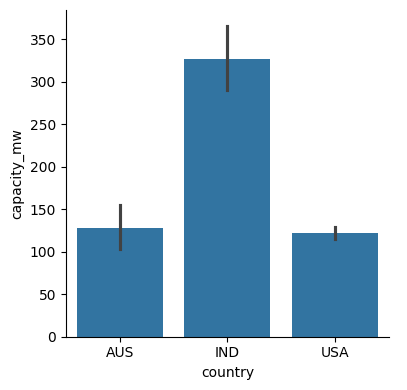

In [98]:
# plot country vs power plant capacity in mega watts

sns.catplot(x='country',y='capacity_mw',kind='bar',data=pp_df1,height=4)
plt.show()

Observation:

    Electricity generation capacity is the highest in India

In [99]:
# view name, id, country and coordinates of power plants having top 3 capacity_wv

grouped=pp_df1.groupby(['name','gppd_idnr','country','location_coords'])['capacity_mw'].mean().sort_values(ascending=False)
grouped_df=pd.DataFrame(grouped)
print('Top 3 Power plants having maximum electricity generation capacity')
grouped_df.head(3)


Top 3 Power plants having maximum electricity generation capacity


,,,,capacity_mw
name,gppd_idnr,country,location_coords,
Grand Coulee,USA0006163,USA,"47.9575,-118.9773",6809.0
VINDH_CHAL STPS,IND0000503,IND,"24.0983,82.6719",4760.0
MUNDRA TPP,IND0000278,IND,"22.823,69.5532",4620.0


Observation:

    Grand Coulee (ID: USA0006163) is the topmost Power Plant generating the maximum electricity of 6809 MW. Its located in USA and location co-ordinates are 47.9575,-118.9773

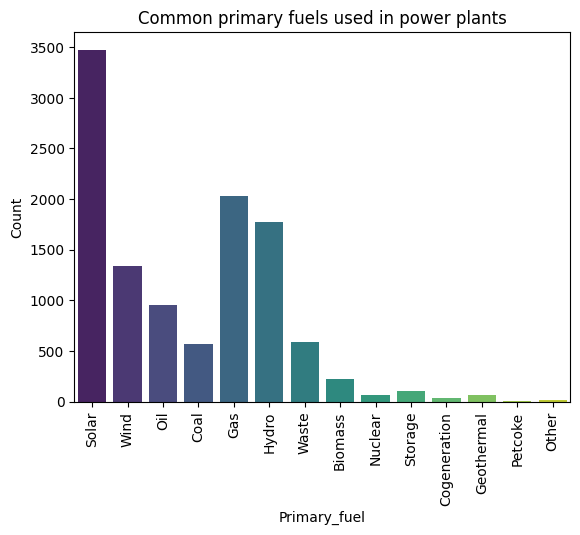

In [100]:
# find most common primary_fuel used

sns.countplot(x='primary_fuel',palette='viridis',data=pp_df1)
plt.xlabel('Primary_fuel')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Common primary fuels used in power plants')
plt.show()

Observation:

    Solar is the most common primary fuel followed by Gas and Hydro fuels.

In [101]:
# view primary fuels used in top countries having top generation capacities

grouped=pp_df1.groupby(['primary_fuel','country'])['capacity_mw'].mean().sort_values(ascending=False)
grouped_df=pd.DataFrame(grouped)
print('Primary fuels used in top countries having top generation capacities')
grouped_df.head()

Primary fuels used in top countries having top generation capacities


capacity_mw
primary_fuel country             
Nuclear      USA      1797.122414
             IND       975.555556
Coal         AUS       912.250000
             USA       871.150699
             IND       797.826434

Observation:

    In USA, power plants utilizing Nuclear fuel has yielded maximum generation capacity in MW
    In INDIA, power plants utilizing Nuclear fuel has yielded maximum generation capacity in MW
    In AUSTRALIA, power plants utilizing Coal fuel has yielded maximum generation capacity in MW

In [102]:
# year-wise total power generated

gwh2013=pp_df[pp_df['generation_gwh_2013']!='NaN']
gwh2014=pp_df[pp_df['generation_gwh_2014']!='NaN']
gwh2015=pp_df[pp_df['generation_gwh_2015']!='NaN']
gwh2016=pp_df[pp_df['generation_gwh_2016']!='NaN']
gwh2017=pp_df[pp_df['generation_gwh_2017']!='NaN']
gwh2018=pp_df[pp_df['generation_gwh_2018']!='NaN']

print(f"Average electricity generated in 2013: {gwh2013['generation_gwh_2013'].mean():.2f} MW")
print(f"Total electricity generated in 2013: {gwh2013['generation_gwh_2013'].sum():.2f} MW")
print()
print(f"Average electricity generated in 2014: {gwh2014['generation_gwh_2014'].mean():.2f} MW")
print(f"Total electricity generated in 2014: {gwh2014['generation_gwh_2014'].sum():.2f} MW")
print()
print(f"Average electricity generated in 2015: {gwh2015['generation_gwh_2015'].mean():.2f} MW")
print(f"Total electricity generated in 2015: {gwh2015['generation_gwh_2015'].sum():.2f} MW")
print()
print(f"Average electricity generated in 2016: {gwh2016['generation_gwh_2016'].mean():.2f} MW")
print(f"Total electricity generated in 2016: {gwh2016['generation_gwh_2016'].sum():.2f} MW")
print()
print(f"Average electricity generated in 2017: {gwh2017['generation_gwh_2017'].mean():.2f} MW")
print(f"Total electricity generated in 2017: {gwh2017['generation_gwh_2017'].sum():.2f} MW")
print()
print(f"Average electricity generated in 2018: {gwh2018['generation_gwh_2018'].mean():.2f} MW")
print(f"Total electricity generated in 2018: {gwh2018['generation_gwh_2018'].sum():.2f} MW")
print()


Average electricity generated in 2013: 563.38 MW
Total electricity generated in 2013: 4039457.70 MW

Average electricity generated in 2014: 635.74 MW
Total electricity generated in 2014: 4789663.13 MW

Average electricity generated in 2015: 616.80 MW
Total electricity generated in 2015: 4930097.40 MW

Average electricity generated in 2016: 561.78 MW
Total electricity generated in 2016: 4888087.01 MW

Average electricity generated in 2017: 532.47 MW
Total electricity generated in 2017: 4947734.31 MW

Average electricity generated in 2018: 513.68 MW
Total electricity generated in 2018: 5063847.74 MW



Skewness in capacity_mw is 5.035169550755057


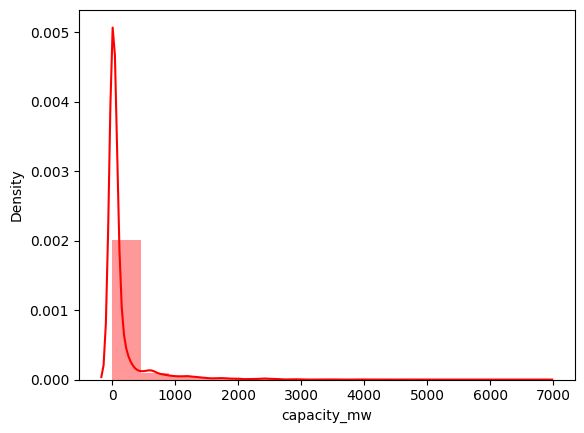

In [108]:
# check data distribution

col=pp_df1['capacity_mw']
print(f'Skewness in {col.name} is {col.skew()}')

sns.distplot(col,bins=15, color='red')
plt.xlabel(col.name)
plt.show()


Observation:

    There is skewness in capacity_mw (+5.03) which can be handled by cuberoot transformation

In [110]:
# reduce skewness by cuberoot transformation

pp_df1['capacity_mw']=np.cbrt(pp_df1['capacity_mw'])
print('Skewness of capacity_mw has been reduced to :',pp_df1['capacity_mw'].skew())

Skewness of capacity_mw has been reduced to : 0.8919029286078468


Skewness in capacity_mw is 0.8919029286078468


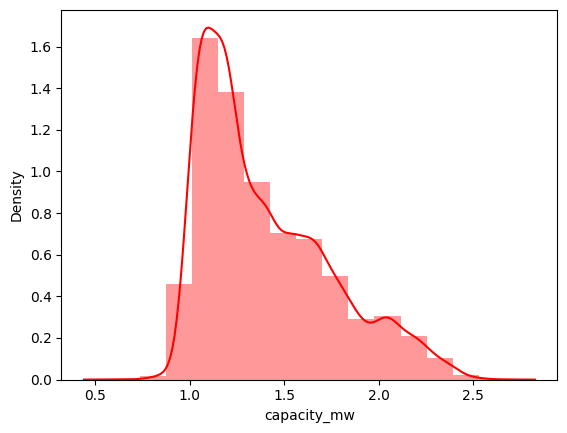

In [111]:
# check data distribution

col=pp_df1['capacity_mw']
print(f'Skewness in {col.name} is {col.skew()}')

sns.distplot(col,bins=15, color='red')
plt.xlabel(col.name)
plt.show()


Observation:

    Skewness has been reduced and the data is almost normally distributed

In [112]:
# drop name, and gppd_idnr as its not relevant for prediction purpose

pp_df1.drop(['name','gppd_idnr','url'],axis=1,inplace=True)

In [113]:
print ('Size of original dataset: ',pp_df.shape)
print ('Size of dataset post-processing: ',pp_df1.shape)

Size of original dataset:  (13298, 27)
Size of dataset post-processing:  (11267, 12)


# Feature Selection

# Feature Selection for Regression Model

In [116]:
# create a copy of pp_df1 for encoding for regression model

pp_df2=pp_df1.copy()

In [118]:
# encoding categorical variables

le=LabelEncoder()
cat=pp_df2.select_dtypes(include=['object']).columns
for i in cat:
  pp_df2[i]=le.fit_transform( pp_df2[i])

pp_df2.head()

,country,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,generation_data_source,location_coords
0,0,0.782507,10,2011.0,110,12,0,2019.0,0.000000,0.0,3,349
1,0,1.000000,10,0.0,111,12,0,2019.0,0.000000,0.0,3,350
2,0,1.406930,13,0.0,4806,12,0,2019.0,92.682222,0.0,0,354
3,0,0.853365,10,2004.0,166,12,0,2019.0,0.000000,0.0,3,108
4,0,1.166529,7,2015.0,1711,12,0,2019.0,0.000000,0.0,3,327


In [119]:
# splitting data into features(x) and label(y)

x=pp_df2.drop('capacity_mw',axis=1)
y=pp_df2['capacity_mw']

In [120]:
# Standard scaling of features

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

In [122]:
# splitting data to training and testing sets


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8450, 11) (8450,) (2817, 11) (2817,)


# Feature Selection for Classification Model

In [123]:
# create a copy of pp_df1 for encoding for classification model

pp_df3=pp_df1.copy()

In [124]:
# encoding categorical variables

le=LabelEncoder()

category=pp_df3.select_dtypes(include=['object']).columns
category1=category.drop('primary_fuel')

for col in category1:
    pp_df3[col]=le.fit_transform(pp_df3[col])

pp_df3.head()

,country,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_gwh_2019,generation_data_source,location_coords
0,0,0.782507,Solar,2011.0,110,12,0,2019.0,0.000000,0.0,3,349
1,0,1.000000,Solar,0.0,111,12,0,2019.0,0.000000,0.0,3,350
2,0,1.406930,Wind,0.0,4806,12,0,2019.0,92.682222,0.0,0,354
3,0,0.853365,Solar,2004.0,166,12,0,2019.0,0.000000,0.0,3,108
4,0,1.166529,Oil,2015.0,1711,12,0,2019.0,0.000000,0.0,3,327


In [125]:
# splitting data into features(X) and label(Y)

X=pp_df3.drop('primary_fuel',axis=1)
Y=pp_df3['primary_fuel']

In [128]:
# encode Y

Y=le.fit_transform(Y)
Y[:5]

array([10, 10, 13, 10,  7])

In [130]:
# Standard scaling of features

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [131]:
# transforming and splitting training and testing sets

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=67)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8450, 11) (8450,) (2817, 11) (2817,)


# MODEL BUILDING & VALIDATION

# Regression Model to predict capacity

In [132]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        cv=cross_val_score(model,x_scaled,y,cv=5).mean()
        print('R2 score: ',r2_score(y_test,y_pred2))


In [134]:
# linear Regression

time1=time.time()

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1,'s')

R2 score:  0.40807792766381656
Time taken for training:  0.1782393455505371 s


In [135]:
# Lasso

time1=time.time()

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1,'s')

R2 score:  -5.573816924009378e-06
Time taken for training:  0.10777759552001953 s


In [136]:
# Ridge

time1=time.time()

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1,'s')

R2 score:  0.4080728174137189
Time taken for training:  0.1399385929107666 s


In [137]:
# Random Forest

time1=time.time()

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1,'s')

R2 score:  0.8840663438651069
Time taken for training:  42.64488625526428 s


In [138]:
# Gradient Boosting

time1=time.time()

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor(random_state=55)
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1,'s')

R2 score:  0.847103927711982
Time taken for training:  10.212613821029663 s


In [139]:
# XGBoost

time1=time.time()

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

print('Time taken for training: ',time.time()-time1)

R2 score:  0.8848523726295244
Time taken for training:  1.6269819736480713


In [145]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)

In [146]:

models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge, 'Random Forest':rfr,'Gradient Boost':gbdt,'XGBoost':xgbr }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
5,XGBoost,0.884852,0.013341,0.072645,0.827860,0.056992
3,Random Forest,0.883901,0.013451,0.070993,0.807483,0.076418
4,Gradient Boost,0.847104,0.017714,0.088641,0.785605,0.061499
0,Linear Regression,0.408078,0.068580,0.217271,0.365422,0.042656
2,Ridge,0.408073,0.068580,0.217273,0.364320,0.043753
1,Lasso,-0.000006,0.115860,0.283176,0.244469,0.244474


Observation:

    We can select XGBoost model as it has the highest r2 score and cross-validation score.  MSE and MAE is also less.

In [148]:
# Hyperparameter tuning of XGBoost model

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,250,50),
        'learning_rate': [0.01,0.05,0.08,0.1]}

rs= RandomizedSearchCV(estimator=xgbr,param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for XGBoost model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for XGBoost model: {'n_estimators': 200, 'min_samples_split': 9, 'max_depth': 4, 'learning_rate': 0.08} 
 Best score: 0.8652812757188114


In [198]:
# Tuned XGBoost (manual tuning also done)

xgbr_1=xgb.XGBRegressor(random_state=55,n_estimators= 450, min_samples_split= 8, max_depth= 4, learning_rate= 0.08)
xgbr_1.fit(x_train,y_train)

score(xgbr_1,x_train,y_train,x_test,y_test,train=True)
score(xgbr_1,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8856429729350487


In [199]:
# compare tuned model with untuned one

models={'XGBoost':xgbr,'Tuned XGBoost':xgbr_1 }

evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned XGBoost,0.885643,0.013249,0.073739,0.831952,0.053691
0,XGBoost,0.884852,0.013341,0.072645,0.827860,0.056992


Hyperparameter tuning has slightly improved the R2 score and cross validation score while decreased the MSE and MAE.
So we could save this tuned model.

Tuned XGBoost Regressor model has:

* R2 score: 0.885  
* Cross Validation: 0.831  
* MSE: 0.013  
* MAE: 0.073  

In [200]:
# save the model

pickle.dump(xgbr_1, open('Powerhouse_capacity_prediction_xgbr1.pkl','wb'))

In [202]:
# load model and view predicted vs actual capacity

Powerhouse_capacity_prediction_model = pickle.load(open('Powerhouse_capacity_prediction_xgbr1.pkl','rb'))
y_pred = Powerhouse_capacity_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted capacity':y_pred,'Actual capacity':y_test})
result.head()

,Predicted capacity,Actual capacity
8435,1.218114,1.195813
620,1.185323,1.195813
322,1.515690,0.836251
6340,1.818732,2.066748
11193,1.232820,1.080060


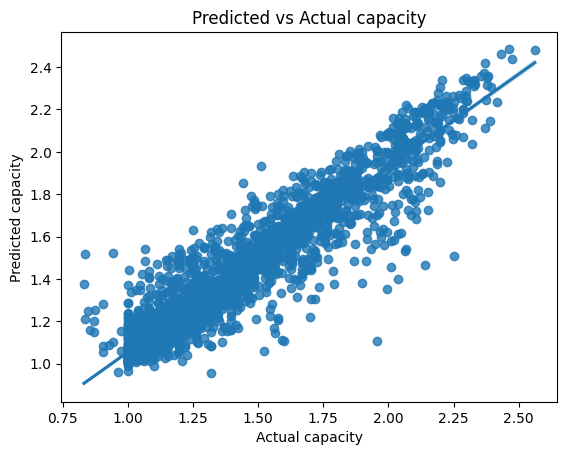

In [203]:
# plot Predicted vs Actual capacity

sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual capacity')
plt.xlabel('Actual capacity')
plt.ylabel('Predicted capacity')
plt.show()

Observation:  

    The XGBoost Regressor model was able to predict the Powerhouse_capacity much closer to the actual capacity with few exceptions as visible by the spread of datapoints outside the regression line in the regplot.

# Classification Model to predict primary fuel

In [205]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,X_test,Y_test,train=True):
    if train:
        Y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,Y_pred1))
    else:
        Y_pred2= model.predict(X_test)
        print('Accuracy of test set: ',accuracy_score(Y_test,Y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(Y_test,Y_pred2,digits=2)}')

# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,X,Y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')


In [207]:
# Logistic Regression

time1=time.time()

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial')
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,X_test,Y_test,train=True)
score(lr,X_train,Y_train,X_test,Y_test,train=False)

cv(lr)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  0.482603550295858
Accuracy of test set:  0.48562300319488816

Classification report of LogisticRegression(multi_class='multinomial') model  :

               precision    recall  f1-score   support

           0       0.57      0.13      0.21        61
           1       0.62      0.46      0.53       137
           2       0.00      0.00      0.00        11
           3       0.43      0.55      0.48       535
           4       0.00      0.00      0.00        10
           5       0.44      0.31      0.36       465
           6       1.00      0.43      0.60        14
           7       0.56      0.02      0.04       237
           9       0.00      0.00      0.00         1
          10       0.51      0.91      0.65       854
          11       0.00      0.00      0.00        22
          12       1.00      0.01      0.01       139
          13       0.45      0.20      0.28       331

    accuracy                           0.49      2817
   macro avg       0

In [208]:
# Random Forest

time1=time.time()

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,X_test,Y_test,train=True)
score(rf,X_train,Y_train,X_test,Y_test,train=False)
cv(rf)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  1.0
Accuracy of test set:  0.8143414980475683

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.71      0.36      0.48        61
           1       0.73      0.64      0.68       137
           2       0.00      0.00      0.00        11
           3       0.73      0.71      0.72       535
           4       0.71      0.50      0.59        10
           5       0.83      0.87      0.85       465
           6       1.00      0.71      0.83        14
           7       0.73      0.79      0.76       237
           9       0.00      0.00      0.00         1
          10       0.92      0.96      0.94       854
          11       0.95      0.86      0.90        22
          12       0.63      0.57      0.60       139
          13       0.80      0.83      0.81       331

    accuracy                           0.81      2817
   macro avg       0.67      0.60      0.63      2817
we

In [209]:
# Gradient Boosting

time1=time.time()

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,X_test,Y_test,train=True)
score(gbc,X_train,Y_train,X_test,Y_test,train=False)
cv(gbc)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  0.8647337278106509
Accuracy of test set:  0.7930422435214768

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.59      0.33      0.42        61
           1       0.75      0.65      0.70       137
           2       0.20      0.09      0.13        11
           3       0.71      0.67      0.69       535
           4       0.62      0.50      0.56        10
           5       0.82      0.87      0.84       465
           6       0.71      0.71      0.71        14
           7       0.73      0.76      0.74       237
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.90      0.96      0.93       854
          11       0.80      0.91      0.85        22
          12       0.60      0.45      0.51       139
          13       0.78      0.81      0.79       331

    accuracy                         

In [212]:
# XGBoost

time1=time.time()

import xgboost as xgb
xgbc=xgb.XGBClassifier(random_state=55)
xgbc.fit(X_train,Y_train)

score(xgbc,X_train,Y_train,X_test,Y_test,train=True)
score(xgbc,X_train,Y_train,X_test,Y_test,train=False)
cv(xgbc)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  0.9975147928994083
Accuracy of test set:  0.8217962371317004

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) model  :

               precision    recall  f1-score   support

           0       0.62      0.38      0.47        61
  

In [213]:
# SVM

time1=time.time()

from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,X_test,Y_test,train=True)
score(svc,X_train,Y_train,X_test,Y_test,train=False)
cv(svc)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  0.5585798816568047
Accuracy of test set:  0.561945331913383

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.56      0.15      0.23        61
           1       0.63      0.42      0.50       137
           2       0.00      0.00      0.00        11
           3       0.50      0.55      0.52       535
           4       0.00      0.00      0.00        10
           5       0.65      0.54      0.59       465
           6       1.00      0.36      0.53        14
           7       0.53      0.07      0.13       237
           9       0.00      0.00      0.00         1
          10       0.55      0.95      0.70       854
          11       1.00      0.05      0.09        22
          12       0.40      0.03      0.05       139
          13       0.61      0.41      0.49       331

    accuracy                           0.56      2817
   macro avg       0.49      0.27      0.29  

Observations:  

    XGBoost seems to perform better than the other models based on the test accuracy and cross validation scores.
    Accuracy of train set:  0.9975147928994083
    Accuracy of test set:  0.8217962371317004
    Cross validation score = 0.736

In [214]:
# Hyperparameter tuning of XGBoost model

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,250,50),
        'learning_rate': [0.01,0.05,0.08,0.1]}

rs= RandomizedSearchCV(estimator=xgbr,param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for XGBoost model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for XGBoost model: {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 7, 'learning_rate': 0.08} 
 Best score: 0.8725392956509792


In [228]:
# Tuned XGBoost (manual tuning also done)

time1=time.time()

xgbc1=xgb.XGBClassifier(random_state=55,n_estimators= 350, min_samples_split= 4, max_depth= 8, learning_rate= 0.09)
xgbc1.fit(X_train,Y_train)

score(xgbc1,X_train,Y_train,X_test,Y_test,train=True)
score(xgbc1,X_train,Y_train,X_test,Y_test,train=False)
cv(xgbc1)

print('Time taken for training: ',time.time()-time1,'s')

Accuracy of train set:  1.0
Accuracy of test set:  0.8232161874334398

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_split=4, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=350,
              n_jobs=None, num_parallel_tree=None, ...) model  :

               precision    recall  f1-score   support

           0       0.62      0.41      0.50        61
           1       0.70     

Observation:  

    Hyperparameter tuning has slightly improved the accuracy score and cross validation score. SO we can select the tuned XGBoost model as the best model for the classification task with:-
    Accuracy of train set:  1.0
    Accuracy of test set:  0.823
    Cross validation score = 0.740

In [229]:
# save the model

pickle.dump(xgbc1, open('Powerhouse_fuel_prediction_xgbc1.pkl','wb'))

In [230]:
# load model and view prediction vs actual region

Powerhouse_fuel_prediction_model=pickle.load(open('Powerhouse_fuel_prediction_xgbc1.pkl','rb'))
Y_pred=Powerhouse_fuel_prediction_model.predict(X_test)

result=pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
result.head()

,Predicted,Actual
0,10,10
1,10,10
2,10,10
3,3,3
4,7,7


Observation:  

    The XGBoost model (xgbc1) was able to predict the primary fuel type of power house plants as confirmed by the above table

# Overall Summary

The dataset on "Global Power Plant Database" was used to analyse and build machine learning models to predict the capacity in MW (Regression model) and predict the primary fuel (Classification model) of Power Plants based on different features.

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, managing skewness, handling nulls, size of the dataset reduced from (13298, 27) to (11267, 12) after all the pre-processing
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering - creation of new columns such as location_coord for data analysis and modelling purpose; scaling of data
4. Model training and evaluation- trained 9 models for the regression problem and 6 models for classification problem; evaluated the models using appropriate metrics to find the best model


# Data Insights

  OVERALL ANALYSIS:

    Dataset contains majority information about power plants in USA
    
    Most used primary fuel is Solar
    
    Maximum unit capacity was recorded in the year 2017
    
    Cypress Creek Renewables is the most common power plant owner
    
    Majority of the data including geolocation information was reported by U.S. Energy Information Administration
    
    Capacity information was mostly reported in the year 2019
    
    Electricity generation capacity is the highest in India
    
    Grand Coulee (ID: USA0006163) is the topmost Power Plant generating the maximum electricity of 6809 MW. Its located in USA and location co-ordinates are 47.9575,-118.9773
    
    Solar is the most common primary fuel followed by Gas and Hydro fuels.
    
    In USA, power plants utilizing Nuclear fuel has yielded maximum generation capacity in MW
    
    In INDIA, power plants utilizing Nuclear fuel has yielded maximum generation capacity in MW
    
    In AUSTRALIA, power plants utilizing Coal fuel has yielded maximum generation capacity in MW


  YEAR-WISE ANALYSIS:
    
    Average electricity generated in 2013: 563.38 MW
    Total electricity generated in 2013: 4039457.70 MW

    Average electricity generated in 2014: 635.74 MW
    Total electricity generated in 2014: 4789663.13 MW

    Average electricity generated in 2015: 616.80 MW
    Total electricity generated in 2015: 4930097.40 MW

    Average electricity generated in 2016: 561.78 MW
    Total electricity generated in 2016: 4888087.01 MW

    Average electricity generated in 2017: 532.47 MW
    Total electricity generated in 2017: 4947734.31 MW

    Average electricity generated in 2018: 513.68 MW
    Total electricity generated in 2018: 5063847.74 MW
    
    
    Highest total electricity was generated in 2018
    

# Selected model

* Regression model

    XGBoost Regressor model was found to be the best model for the regression task to predict the capacity of a power house plant in megawatts (MW), with:-

   * R2 score: 0.885
   * Cross Validation: 0.831
   * MSE: 0.013
   * MAE: 0.073
   
* Classification model

    XGBoost model is found to be the best model for the classification task to predict the primary fuel type of a power house plant, with:-
  * Accuracy of train set:  1.0
  * Accuracy of test set:  0.823
  * Cross validation score = 0.740   
